# Stop the Churn
by AJ Martinez 

## Project goal
- Main goal for this project is to identify drivers of churn.
- Build a machine learning model that can predict customer churn
- Deliver the report that is easy to understand

## Project Description

- Telco is a communication company that delivers great service to all its customers. 
- In this project we are going to dive into current churn rate. 
- Discuss features with the highest and lowest churn rate. 
- Discuss what demographic should be the main focus and what are the indications that drives the churn rate with them.

## Initial Questions
- What is Telco's churn rate?
- What are the top 3 features with the highest churn rate?
- What are the top 3 features with the lowest churn rate?
- What demographic has the highest churn rate?

## Wrangle Telco Data

In [1]:
import acquire
import prepare
import project
import model

Reading from csv file...
Reading from csv file...


First we acquire the data from either a csv file or sql server.

In [2]:
# Using Acquire python file in this repo, we can get the information trnasferred into a pandas DataFrame
telco_df = acquire.get_telco_data()

Reading from csv file...


Now we clean the information obtained from file or server. When we clean data we start by removing spaces, null values, caps and special characters.

In [3]:
# Using Prepare python file in this repo will clean the DataFrame
telco_df = prepare.prep_telco(telco_df)

Once we have a clean dataframe and everything encoded, we can get our train, test, validate numbers.

In [4]:
# Using Prepare python file in this repo, get the train validate test values
train, validate, test = prepare.split_telco_data(telco_df)

## Set the Data Context

In [5]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
gender_encoded,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
partner_encoded,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
dependents_encoded,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
phone_service_encoded,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
paperless_billing_encoded,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
churn_encoded,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


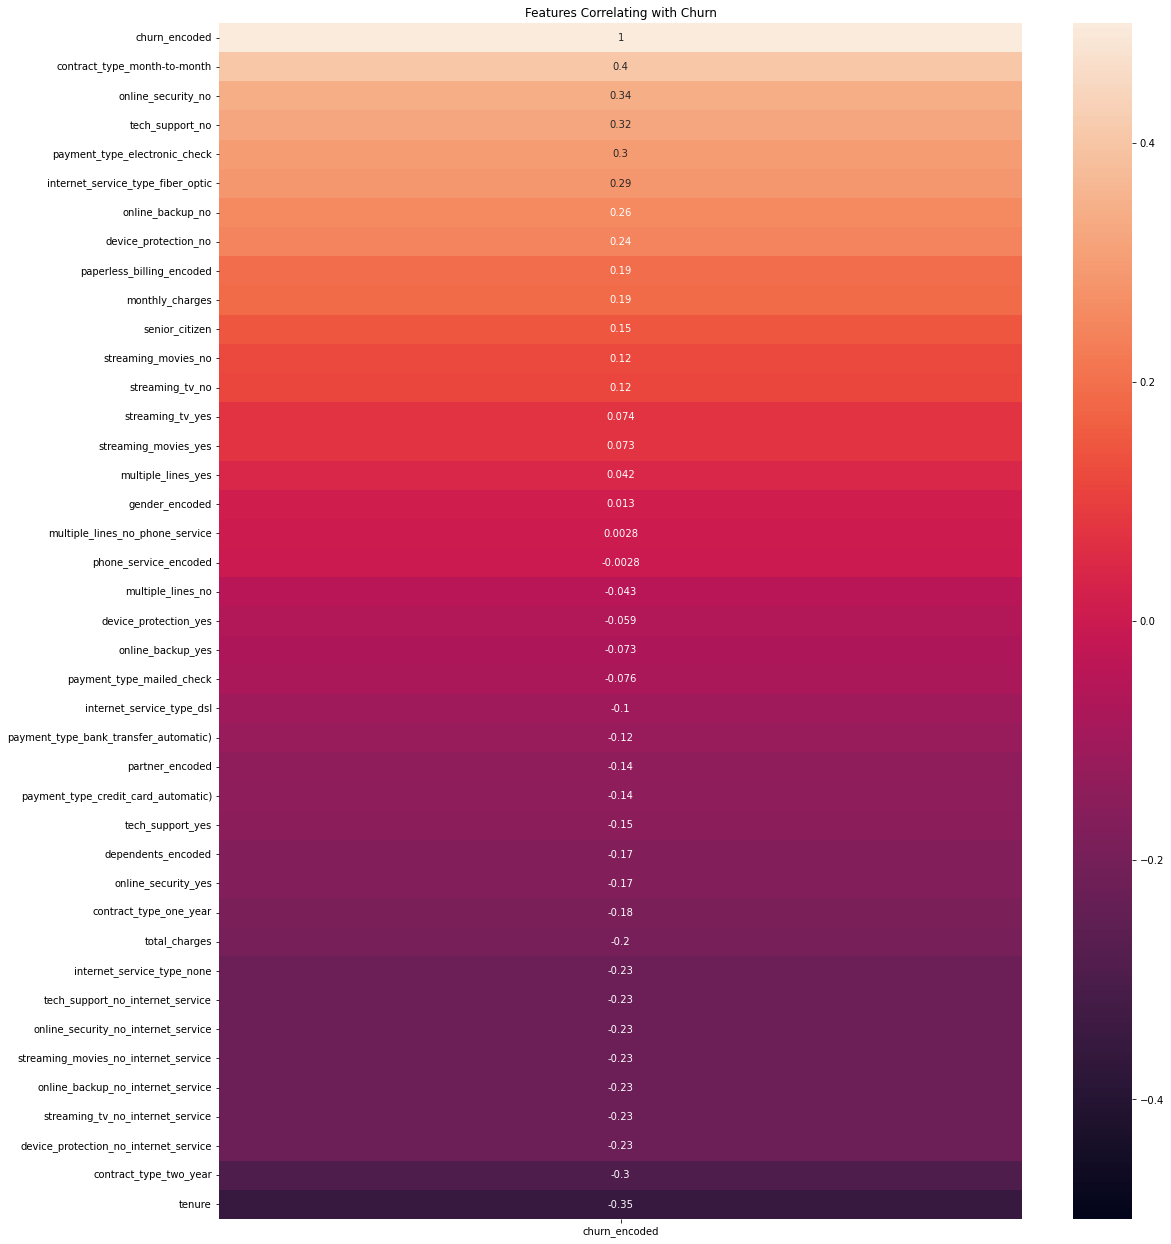

In [6]:
project.churn_heat_map()

## Exploratory Analysis: Drivers of Churn


### Question 1
#### What is Telco's churn rate?

### Answer 1
####  Current churn rate is: 26.57%

Churn percentage 26.57%


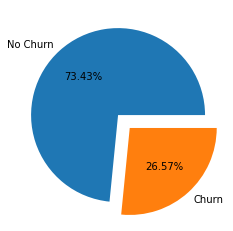

In [7]:
project.churn_rate()

### Question 2
#### What are the top 3 features with the highest churn rate?

### Answer 2
1. Month-to-month Contract
2. No Online security 
3. No Tech Support

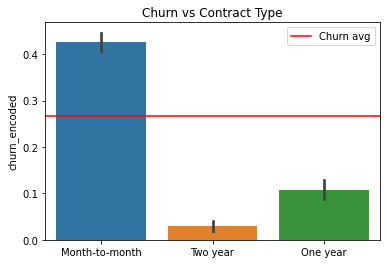

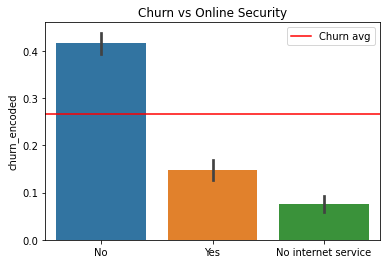

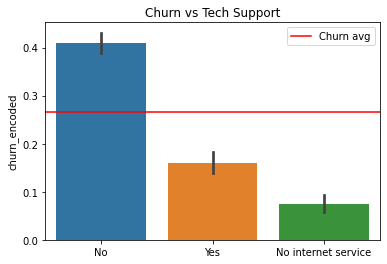

In [8]:
project.top_3_viz()

In [9]:
project.top_3_churn()

Contract Type vs Churn
HO: There is no relation between month-to-month contract and churn rate
H⍺: There is a relation between month-to-month contract and churn rate
---------------------------------------------

churn_encoded      0    1
contract_type            
Month-to-month  1252  929
One year         743   90
Two year         896   27
Observed
:
[[1252  929]
 [ 743   90]
 [ 896   27]]
------------------------
Expected: 

[[1601  579]
 [ 611  221]
 [ 677  245]]
------------------------

chi2 = 657.71
p value: 0.0000
degrees of freedom: 2
We reject the null hypothesis


### Question 3
#### What are the top 3 features with the lowest churn rate?


### Answer 3
1. Tenure
2. 2 year Contract
3. No internet Service(7)

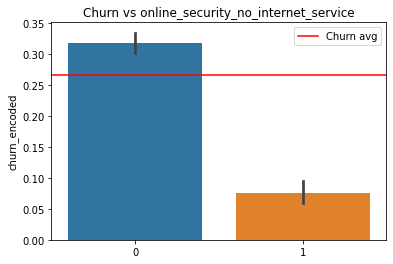

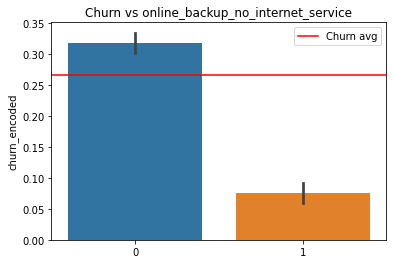

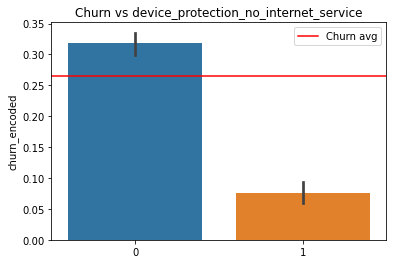

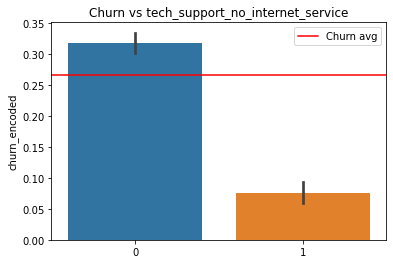

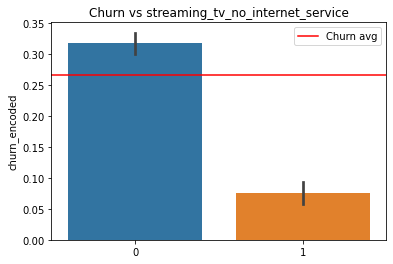

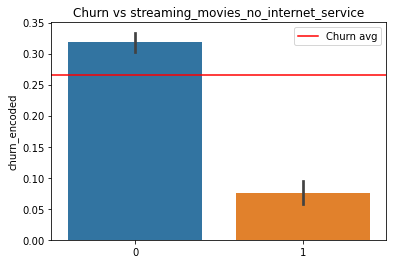

In [10]:
project.q_3_viz()

### Question 4
#### What demographic has the highest churn rate?

### Answer 4

Senior Citizens are the highest churn, the majority uses electronic checks. 

In [11]:
project.q_4_churn()

Senior Citizen vs Churn
HO: There is no relation between month-to-month senior citizen and churn rate
H⍺: There is a relation between month-to-month senior citizen and churn rate
---------------------------------------------

churn_encoded      0    1
senior_citizen           
0               2520  784
1                371  262
Observed
:
[[2520  784]
 [ 371  262]]
------------------------
Expected: 

[[2426  877]
 [ 464  168]]
------------------------

chi2 = 84.03
p value: 0.0000
degrees of freedom: 1
We reject the null hypothesis


## Summary

### Prediction

### Baseline

In [12]:
# Baseline
model.baseline_churn()

Baseline accuracy: 73.4315%


### Fit 3 Models

In [13]:
# Decision Tree
model.dec_tree_class()

Max depth 6 performs the best
    max_depth  train_accuracy  validate_accuracy  difference
0           1        0.734315           0.734005    0.000311
1           2        0.754128           0.783768   -0.029640
2           3        0.788672           0.799763   -0.011091
3           4        0.797308           0.793246    0.004061
4           5        0.801118           0.787322    0.013795
5           6        0.811786           0.798578    0.013207
6           7        0.824486           0.792062    0.032424
7           8        0.843282           0.774289    0.068993
8           9        0.869444           0.763033    0.106411
9          10        0.892304           0.768957    0.123346
10         11        0.913132           0.757701    0.155430
11         12        0.933452           0.739336    0.194115
12         13        0.951740           0.752370    0.199370
13         14        0.967234           0.746445    0.220788
14         15        0.974854           0.744668    0.2

In [14]:
# Random Forest
model.ran_tree_class()

Max depth 5, Min leaf 5 performs the best
   min_per_leaf  max_depth  train_accuracy  validate_accuracy  difference
0             1          9        0.859284           0.805687    0.053597
1             2          8        0.835408           0.807464    0.027943
2             3          7        0.822708           0.803910    0.018798
3             4          6        0.815342           0.798578    0.016763
4             5          5        0.803912           0.803910    0.000002
5             6          4        0.797308           0.801540   -0.004233
6             7          3        0.790196           0.793839   -0.003643
7             8          2        0.757430           0.768957   -0.011528
8             9          1        0.734315           0.734005    0.000311


In [15]:
# K Nearest Neighbors
model.knn_model()

KNC with 20 neighbors performs the best
Accuracy using Model Score: 79.50%
Using Confusion Matrix:
      0    1
0  2740  151
1   656  390
Class report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2891
           1       0.72      0.37      0.49      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.80      0.77      3937

True Positive(tp): 390 
False Positive(fp): 151 
False Negative(fn): 656 
True Negative(tn): 2740
Accuracy: 0.795
True Positive Rate: 0.3728
False Positive Rate: 0.05223
True Negative Rate: 0.9478
False Negative Rate: 0.6272
Precision: 0.7209
Recall: 0.3728
F1 Score: 0.4915
Support (0): 1046
Support (1): 2891


## Conclusion

### Summary

We now know our churn rate is 27%. We were able to identify the main drivers of churn. As we can see the main issues are the short term contracts, non automatic payments, customers without internet security and tech support. We also went over three different models of machine learning and their performance.


### Recomendations
- Incentivize customer to get on long term contract
- Set customers with automatic payments
- Provide features such as:
    - Internet Security
    - Technical Support

### Next Steps
- Measure customer satisfaction with surveys
- Look at what is causing the fiber internet customer to churn
- Look at the performance of ML in more data